## **EDA analysis**
En este notebook se realiza un an√°lisis exploratorio de datos (`EDA`) sobre el dataset de medicamentos `fichas_tecnicas_mapped_atc.json`, incluyendo lo siguiente:

**1.** Estad√≠sticas descriptivas

**2.** Distribuci√≥n de clases (niveles ATC)


---
### **Librer√≠as**

In [10]:
# Importaci√≥n de librer√≠as esenciales para el an√°lisis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import unidecode
from wordcloud import WordCloud
import re
import nltk
from nltk.tokenize import word_tokenize
import pickle
import os
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer


# Configuraci√≥n de visualizaci√≥n
plt.style.use("classic")
sns.set(font_scale=1.2)
plt.rcParams["figure.figsize"] = (12, 8)
plt.rcParams["axes.labelsize"] = 12

---
### **1. Carga de datos y estad√≠sticas descriptivas**

In [2]:
# Cargar el archivo JSON
file_path = "../../data/outputs/2_data_preprocessing/fichas_tecnicas_mapped_atc.json"
medicamentos_df = pd.read_json(file_path)

# Creamos la carpeta images
if not os.path.exists("../../images"):
    os.makedirs("../../images")

# Normalizar nombres de columnas (quitar tildes, espacios y convertir a min√∫sculas)
medicamentos_df.columns = [
    unidecode.unidecode(col).lower().replace(" ", "_")
    for col in medicamentos_df.columns
]

# Mostrar las primeras filas para verificar
print("Primeras filas del dataset:")
display(medicamentos_df.head())

# Informaci√≥n general
print("\nInformaci√≥n del dataset:")
display(medicamentos_df.info())

# Estad√≠sticas descriptivas
print("\nEstad√≠sticas descriptivas:")
display(medicamentos_df.describe(include="all"))

# Verificar valores faltantes
print("\nValores faltantes por columna:")
missing_values = medicamentos_df.isnull().sum().sort_values(ascending=False)
missing_percent = (missing_values / len(medicamentos_df)) * 100
missing_df = pd.DataFrame(
    {"Valores faltantes": missing_values, "Porcentaje (%)": missing_percent}
)
display(missing_df[missing_df["Valores faltantes"] > 0])

Primeras filas del dataset:


indicaciones  \
0  en base a su efecto antiagregante plaquetario ...   
1  tratamiento o alivio sintom√°tico del dolor oca...   
2  alivio de los s√≠ntomasde procesos catarrales y...   
3  abacavir accord est√° indicado en el tratamient...   
4  abacavir/lamivudina accord est√° indicado en el...   

                                           posologia  \
0  posolog√≠a: como inhibidor de la agregaci√≥n pla...   
1  posolog√≠a: dosis media recomendada: adultos y ...   
2  posolog√≠a: adultos mayores de 18 a√±os: 1 sobre...   
3  abacavir se debe prescribir por m√©dicos con ex...   
4  el tratamiento debe ser prescrito por un m√©dic...   

                                  contraindicaciones  \
0  no se debe administrar √°cido acetilsalic√≠lico ...   
1  no se debe administrar √°cido acetilsalic√≠lico ...   
2  insuficiencia renal y hep√°tica grave. - hipers...   
3  hipersensibilidad a abacavir o a alguno de los...   
4  hipersensibilidad a los principios activos o a...   

                                        advertencias  \
0  dado el efecto antiagregante plaquetario del √°...   
1  dado el efecto antiagregante plaquetario del √°...   
2  - debido a su contenido en paracetamol, se deb...   
3  reacciones de hipersensibilidad (ver tambi√©n s...   
4  se incluyen en este ep√≠grafe las advertencias ...   

                                       interacciones  \
0  combinaciones contraindicadas : metotrexato ut...   
1  combinaciones contraindicadas : metotrexato ut...   
2  interacciones debidas al paracetamol: el parac...   
3  el potencial de interacciones mediadas por el ...   
4  este medicamento contiene abacavir y lamivudin...   

                                 fertilidad_embarazo  \
0  embarazo el √°cido acetilsalic√≠lico atraviesa l...   
1  embarazo el √°cido acetilsalic√≠lico atraviesa l...   
2  embarazo: paracetamol: datos epidemiol√≥gicos d...   
3  embarazo como norma general, cuando se tome la...   
4  embarazo como norma general, cuando se decida ...   

                                    efectos_conducir  \
0  no se ha observado ning√∫n efecto sobre la capa...   
1  no se ha observado ning√∫n efecto sobre la capa...   
2  este medicamento puede producir somnolencia al...   
3  no se han realizado estudios de los efectos so...   
4  no se han realizado estudios de los efectos so...   

                                 reacciones_adversas  \
0  los efectos adversos del √°cido acetilsalic√≠lic...   
1  los efectos adversos del √°cido acetilsalic√≠lic...   
2  durante el periodo de utilizaci√≥n del paraceta...   
3  en el caso de muchas reacciones adversas comun...   
4  resumen del perfil de seguridad las reacciones...   

                                          sobredosis      atc  ...  \
0  diagn√≥stico: - los s√≠ntomas de intoxicaci√≥n mo...  B01AC06  ...   
1  diagn√≥stico: - los s√≠ntomas de intoxicaci√≥n mo...  N02BA01  ...   
2  paracetamol: la sintomatolog√≠a por sobredosis ...  N02BE51  ...   
3  se han administrado dosis √∫nicas de hasta 1.20...  J05AF06  ...   
4  no se han identificado s√≠ntomas o signos espec...  J05AR02  ...   

  atc_nivel_anatomico         descripcion_nivel_anatomico  \
0                   B    sangre y √≥rganos hematopoy√©ticos   
1                   N                    sistema nervioso   
2                   N                    sistema nervioso   
3                   J  antiinfecciosos para uso sist√©mico   
4                   J  antiinfecciosos para uso sist√©mico   

  atc_nivel_2_subgrupo_terapeutico descripcion_nivel_2_subgrupo_terapeutico  \
0                              B01                  agentes antitromb√≥ticos   
1                              N02                              analg√©sicos   
2                              N02                              analg√©sicos   
3                              J05           antivirales para uso sist√©mico   
4                              J05           antivirales para uso sist√©mico   

  atc_nivel_3_subgrupo_terapeut


Informaci√≥n del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19909 entries, 0 to 19908
Data columns (total 26 columns):
 #   Column                                                          Non-Null Count  Dtype 
---  ------                                                          --------------  ----- 
 0   indicaciones                                                    19571 non-null  object
 1   posologia                                                       19828 non-null  object
 2   contraindicaciones                                              19855 non-null  object
 3   advertencias                                                    19830 non-null  object
 4   interacciones                                                   19550 non-null  object
 5   fertilidad_embarazo                                             19706 non-null  object
 6   efectos_conducir                                                19828 non-null  object
 7   reacciones_adversas            

None


Estad√≠sticas descriptivas:


indicaciones  \
count                                               19571   
unique                                               9385   
top     tratamiento de la hipercolesterolemia adultos,...   
freq                                                  116   

                                                posologia  \
count                                               19828   
unique                                              13044   
top     posolog√≠a adultos la dosis recomendada es de 1...   
freq                                                   75   

                                       contraindicaciones  \
count                                               19855   
unique                                               8576   
top     hipersensibilidad al principio activo o a algu...   
freq                                                 1807   

                                             advertencias  \
count                                               19830   
unique                                              13026   
top     se debe informar con claridad a los pacientes ...   
freq                                                   20   

                                         interacciones  \
count                                            19550   
unique                                           10793   
top     no se han realizado estudios de interacciones.   
freq                                               148   

                                      fertilidad_embarazo efectos_conducir  \
count                                               19706            19828   
unique                                               9958             6355   
top     embarazo no se ha evaluado la seguridad y efic...      no procede.   
freq                                                  102              282   

                                      reacciones_adversas  \
count                                               19841   
unique                                              13815   
top     resumen del perfil de seguridad la seguridad d...   
freq                                                   19   

                                               sobredosis    atc  ...  \
count                                               19766  17592  ...   
unique                                               8100   1983  ...   
top     no existe un tratamiento espec√≠fico en caso de...   N05A  ...   
freq                                                  180    387  ...   

       atc_nivel_anatomico descripcion_nivel_anatomico  \
count                17592                       17176   
unique                  30                          14   
top                      N            sistema nervioso   
freq                  4491                        4491   

       atc_nivel_2_subgrupo_terapeutico  \
count                             17592   
unique                              331   
top                                 C09   
freq                               1635   

                 descripcion_nivel_2_subgrupo_terapeutico  \
count                                               16692   
unique                                                 91   
top     agentes que act√∫an sobre el sistema renina-ang...   
freq                                                 1635   

       atc_nivel_3_subgrupo_terapeutico_farmacologico  \
count                                           17592   
unique                                            541   
top                                              C09D   
freq                                              840   

       descripcion_nivel_3_subgrupo_terapeutico_farmacologico  \
count                                               16687       
unique                                                221       
top     bloqueadores de los receptores de angiotensina...       
freq                                                  840       

       atc_nivel_4_subgrupo_terapeutico


Valores faltantes por columna:


Valores faltantes  \
descripcion_nivel_5_principio_activo                             7671   
atc_nivel_5_principio_activo                                     7186   
descripcion_nivel_4_subgrupo_terapeutico_farmac...               6714   
atc_nivel_4_subgrupo_terapeutico_farmacologico_...               5980   
descripcion_nivel_3_subgrupo_terapeutico_farmac...               3222   
descripcion_nivel_2_subgrupo_terapeutico                         3217   
descripcion_nivel_anatomico                                      2733   
fecha_revision                                                   2415   
atc_nivel_3_subgrupo_terapeutico_farmacologico                   2317   
atc_nivel_2_subgrupo_terapeutico                                 2317   
atc                                                              2317   
atc_nivel_anatomico                                              2317   
precauciones_conservacion                                         476   
incompatibilidades                                                386   
excipientes                                                       368   
interacciones                                                     359   
propiedades_farmacocineticas                                      339   
indicaciones                                                      338   
fertilidad_embarazo                                               203   
sobredosis                                                        143   
posologia                                                          81   
efectos_conducir                                                   81   
advertencias                                                       79   
reacciones_adversas                                                68   
contraindicaciones                                                 54   

                                                    Porcentaje (%)  
descripcion_nivel_5_principio_activo                     38.530313  
atc_nivel_5_principio_activo                             36.094229  
descripcion_nivel_4_subgrupo_terapeutico_farmac...       33.723442  
atc_nivel_4_subgrupo_terapeutico_farmacologico_...       30.036667  
descripcion_nivel_3_subgrupo_terapeutico_farmac...       16.183636  
descripcion_nivel_2_subgrupo_terapeutico                 16.158521  
descripcion_nivel_anatomico                              13.727460  
fecha_revision                                           12.130192  
atc_nivel_3_subgrupo_terapeutico_farmacologico           11.637953  
atc_nivel_2_subgrupo_terapeutico                         11.637953  
atc                                                      11.637953  
atc_nivel_anatomico                                      11.637953  
precauciones_conservacion                                 2.390878  
incompatibilidades                                        1.938822  
excipientes                                               1.848410  
interacciones                                             1.803205  
propiedades_farmacocineticas                              1.702748  
indicaciones                                              1.697725  
fertilidad_embarazo                                       1.019639  
sobredosis                                                0.718268  
posologia                                                 0.406851  
efectos_conducir                                          0.406851  
advertencias                                              0.396805  
reacciones_adversas                                       0.341554  
contraindicaciones                                        0.271234

---
### **2. Distribuci√≥n de las clases**
En nuestro caso, hemos elegido como 'clases' los nombres de los distintos `niveles del c√≥digo ATC` de los medicamentos (ver diccionario de datos en el `README.md`), concretamente el `grupo anat√≥mico`, ya que es lo que usaremos como variable objetivo en la clasificaci√≥n realizada en el siguiente apartado.

Para ver la distribuci√≥n de otros niveles del c√≥digo ATC, simplemente hay que cambiar el `nivel_ATC` en el siguiente bloque de c√≥digo, seg√∫n:
- `nivel_ATC = 1` para el `Grupo Anat√≥mico`
- `nivel_ATC = 2` para el `Subgrupos Terap√©utico`
- `nivel_ATC = 3` para el `Subgrupos Farmacol√≥gico` 
- `nivel_ATC = 4` para el `Subgrupos Farmacol√≥gicos Qu√≠micos`

Gr√°fica guardada en: ../../images/distribucion_grupos_anatomicos.png


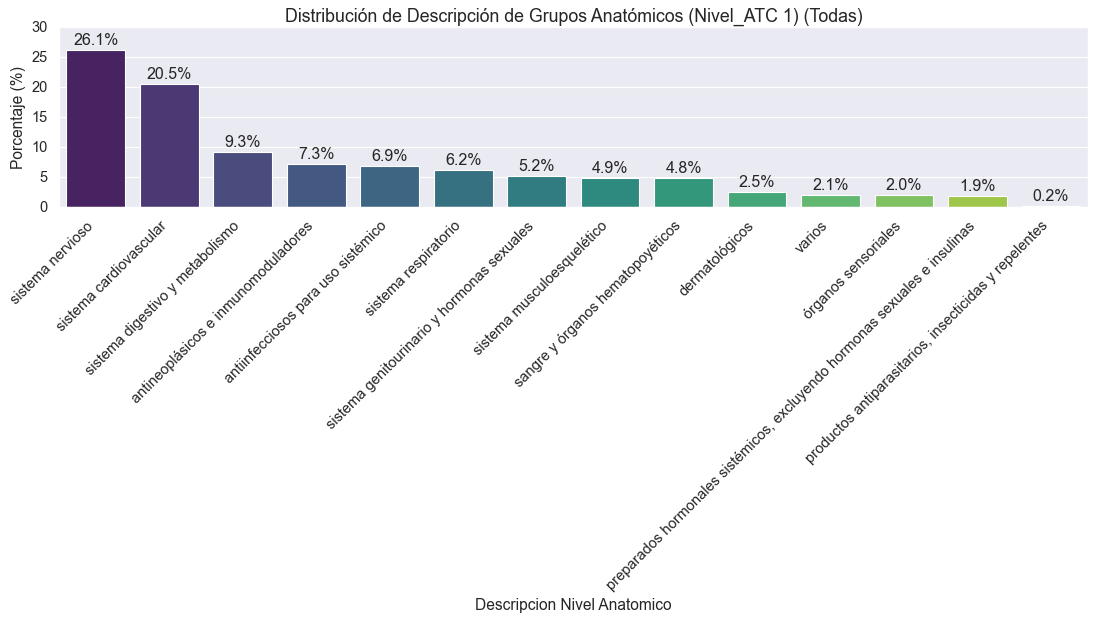

In [11]:
def plot_category_distribution(dataframe, nivel_ATC, top_n=None, palette="viridis"):
    # Mapeo de niveles ATC a columnas y t√≠tulo correspondiente
    niveles = {
        1: {
            "codigo": "atc_nivel_anatomico",
            "descripcion": "descripcion_nivel_anatomico",
            "titulo": "Grupos Anat√≥micos"
        },
        2: {
            "codigo": "atc_nivel_2_subgrupo_terapeutico",
            "descripcion": "descripcion_nivel_2_subgrupo_terapeutico",
            "titulo": "Subgrupos Terap√©uticos"
        },
        3: {
            "codigo": "atc_nivel_3_subgrupo_terapeutico_farmacologico",
            "descripcion": "descripcion_nivel_3_subgrupo_terapeutico_farmacologico",
            "titulo": "Subgrupos Farmacol√≥gicos"
        },
        4: {
            "codigo": "atc_nivel_4_subgrupo_terapeutico_farmacologico_quimico",
            "descripcion": "descripcion_nivel_4_subgrupo_terapeutico_farmacologico_quimico",
            "titulo": "Subgrupos Farmacol√≥gicos Qu√≠micos"
        }
    }

    if nivel_ATC not in niveles:
        raise ValueError("El nivel_ATC debe ser un entero entre 1 y 4.")

    # Seleccionar las columnas correspondientes al nivel_ATC elegido
    codigo = niveles[nivel_ATC]["codigo"]
    descripcion = niveles[nivel_ATC]["descripcion"]
    titulo_nivel = niveles[nivel_ATC]["titulo"]

    plt.figure(figsize=(14, 8))

    # Obtener la distribuci√≥n de categor√≠as (conteo de observaciones)
    counts = dataframe[descripcion].value_counts()
    if top_n is not None:
        counts = counts.head(top_n)

    # Calcular el porcentaje respecto al total de observaciones en la columna
    total_observaciones = dataframe[descripcion].count()
    percentages = counts / total_observaciones * 100

    # Crear gr√°fico de barras con porcentajes
    ax = sns.barplot(
        x=percentages.index,
        y=percentages.values,
        palette=palette,
        hue=percentages.index,
    )

    # T√≠tulo autom√°tico que incluye el nivel_ATC y la categor√≠a correspondiente
    plt.title(
        f"Distribuci√≥n de Descripci√≥n de {titulo_nivel} (Nivel_ATC {nivel_ATC}) {'(Todas)' if top_n is None else f'(Top {top_n})'}",
        fontsize=16
    )
    plt.xlabel(descripcion.replace("_", " ").title(), fontsize=14)
    plt.ylabel("Porcentaje (%)", fontsize=14)
    plt.xticks(rotation=45, ha="right")

    # A√±adir etiquetas con el porcentaje sobre cada barra
    for p in ax.patches:
        ax.annotate(
            "{:.1f}%".format(p.get_height()),
            (p.get_x() + p.get_width() / 2.0, p.get_height()),
            ha="center",
            va="center",
            xytext=(0, 9),
            textcoords="offset points",
        )

    plt.tight_layout()

    # Guardar la imagen de la gr√°fica en la carpeta ../../images
    output_image_folfer = "../../images/"
    plt.savefig(os.path.join(output_image_folfer, 'distribucion_grupos_anatomicos.png'), bbox_inches="tight")
    print(f"Gr√°fica guardada en: {os.path.join(output_image_folfer, 'distribucion_grupos_anatomicos.png')}")
    plt.show()
    

# Distribuci√≥n de Grupos Anat√≥micos (Nivel_ATC 1) mostrando todas las clases
plot_category_distribution(
    medicamentos_df,
    nivel_ATC=1, # Grupos Anat√≥micos
)

Observaciones (para el `Grupo Anat√≥mico`):
- Pr√°cticamente la mitad de los medicamentos pertenecen a los grupos anat√≥micos `sistema nervioso` o `sistema cardiovascular`.
- El resto de grupos anat√≥micos tienen una representaci√≥n m√°s baja y similar entre ellos.
- El grupo anat√≥mico `productos antiparasitarios, insecticidas y repelentes` es, con mucha diferencia, el que menos medicamentos tiene.
Esto quiz√°s nos ponga problemas a la hora de clasificar, ya que el modelo puede no aprender lo suficiente sobre este grupo anat√≥mico.

---
### **3. Obtener en la columna `texto_completo` todo el contenido de los campos de cada medicamento**

In [4]:
medicamentos_df.columns

Index(['indicaciones', 'posologia', 'contraindicaciones', 'advertencias',
       'interacciones', 'fertilidad_embarazo', 'efectos_conducir',
       'reacciones_adversas', 'sobredosis', 'atc',
       'propiedades_farmacocineticas', 'excipientes', 'incompatibilidades',
       'precauciones_conservacion', 'fecha_revision', 'nombre_medicamento',
       'atc_nivel_anatomico', 'descripcion_nivel_anatomico',
       'atc_nivel_2_subgrupo_terapeutico',
       'descripcion_nivel_2_subgrupo_terapeutico',
       'atc_nivel_3_subgrupo_terapeutico_farmacologico',
       'descripcion_nivel_3_subgrupo_terapeutico_farmacologico',
       'atc_nivel_4_subgrupo_terapeutico_farmacologico_quimico',
       'descripcion_nivel_4_subgrupo_terapeutico_farmacologico_quimico',
       'atc_nivel_5_principio_activo', 'descripcion_nivel_5_principio_activo'],
      dtype='object')

In [12]:
# Descargar recursos necesarios de NLTK
nltk.download("punkt")

# Cargar stopwords desde el archivo
with open("../../assets/spanish_stopwords.txt", "r", encoding="utf-8") as f:
    stopwords_set = set(f.read().splitlines())

# Lista de columnas de texto con descripciones (sin incluir los c√≥digos ATC)
cols_texto = [
    "indicaciones",
    "posologia",
    "contraindicaciones",
    "advertencias",
    "interacciones",
    "fertilidad_embarazo",
    "efectos_conducir",
    "reacciones_adversas",
    "sobredosis",
    "atc",
    "propiedades_farmacocineticas",
    "excipientes",
    "incompatibilidades",
    "precauciones_conservacion",
    "fecha_revision",
    "nombre_medicamento",
    "descripcion_nivel_anatomico",
    "descripcion_nivel_2_subgrupo_terapeutico",
    "descripcion_nivel_3_subgrupo_terapeutico_farmacologico",
    "descripcion_nivel_4_subgrupo_terapeutico_farmacologico_quimico",
    "descripcion_nivel_5_principio_activo",
]


# Funci√≥n de limpieza de texto mejorada
def limpiar_texto(texto):
    # Convertir a min√∫sculas
    texto = texto.lower()

    # Eliminar caracteres especiales y n√∫meros
    texto = re.sub(r"[^\w\s]", " ", texto)
    texto = re.sub(r"\d+", " ", texto)
    
    # Eliminar espacios m√∫ltiples
    texto = re.sub(r"\s+", " ", texto)
    return texto.strip()

# Aplicar la limpieza a cada columna de texto y unir
texto_por_medicamento = medicamentos_df[cols_texto].fillna("").applymap(limpiar_texto)
texto_concatenado = texto_por_medicamento.apply(lambda row: " ".join(row), axis=1)

# Crear un DataFrame con el ID del medicamento y su texto concatenado
texto_medicamentos_df = pd.DataFrame(
    {
        "medicamento": medicamentos_df["nombre_medicamento"],
        "descripcion_nivel_anatomico": medicamentos_df["descripcion_nivel_anatomico"],
        "descripcion_nivel_2_subgrupo_terapeutico": medicamentos_df[
            "descripcion_nivel_2_subgrupo_terapeutico"
        ],
        "descripcion_nivel_3_subgrupo_terapeutico_farmacologico": medicamentos_df[
            "descripcion_nivel_3_subgrupo_terapeutico_farmacologico"
        ],
        "descripcion_nivel_4_subgrupo_terapeutico_farmacologico_quimico": medicamentos_df[
            "descripcion_nivel_4_subgrupo_terapeutico_farmacologico_quimico"
        ],
        "descripcion_nivel_5_principio_activo": medicamentos_df[
            "descripcion_nivel_5_principio_activo"
        ],
        "texto_completo": texto_concatenado,
    }
)

# Mostrar ejemplos de texto procesado
print("Ejemplos de texto procesado por medicamento:")
display(texto_medicamentos_df[["medicamento", "texto_completo"]].head(2))

# Unir todo el texto para an√°lisis global
texto_completo = " ".join(texto_concatenado.tolist())
word_count = len(texto_completo.split())
print(f"N√∫mero total de palabras en el corpus: {word_count}")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pablo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
C:\Users\pablo\AppData\Local\Temp\ipykernel_5524\1253991068.py:48: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  texto_por_medicamento = medicamentos_df[cols_texto].fillna("").applymap(limpiar_texto)


Ejemplos de texto procesado por medicamento:


medicamento  \
0  A.A.S._100_mg_COMPRIMIDOS   
1  A.A.S._500_mg_COMPRIMIDOS   

                                      texto_completo  
0  en base a su efecto antiagregante plaquetario ...  
1  tratamiento o alivio sintom√°tico del dolor oca...

N√∫mero total de palabras en el corpus: 102429548


---
### **4. Wordcloud**
Antes de obtener el wordcloud, se ha creado una lista con stop words en espa√±ol, que se ha utilizado para eliminar palabras que no aportan informaci√≥n relevante al an√°lisis.

Se incluye tanto el wordcloud global (con todas las palabras) como el wordcloud por cada grupo anat√≥mico, para ver qu√© palabras son m√°s representativas de cada grupo.

Estas im√°genes se encuentran en la ruta `data/outputs/3_eda/wordclouds`

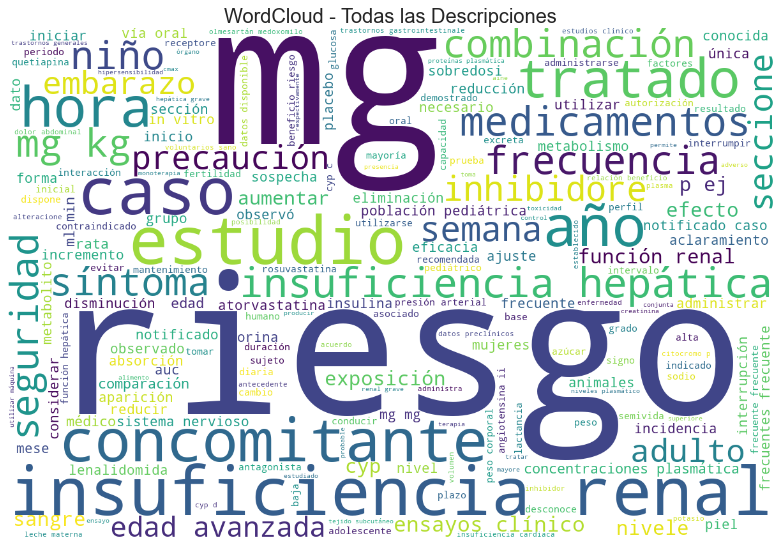

WordCloud global guardado en: ../../data/outputs/3_eda/word_clouds\wordcloud_global.png y ../../images/wordclouds/wordcloud_global.png
WordCloud para el grupo 'sangre y √≥rganos hematopoy√©ticos' guardado en: ../../data/outputs/3_eda/word_clouds\sangre_y_√≥rganos_hematopoy√©ticos.png y ../../images/wordclouds/sangre_y_√≥rganos_hematopoy√©ticos.png
WordCloud para el grupo 'sistema nervioso' guardado en: ../../data/outputs/3_eda/word_clouds\sistema_nervioso.png y ../../images/wordclouds/sistema_nervioso.png
WordCloud para el grupo 'antiinfecciosos para uso sist√©mico' guardado en: ../../data/outputs/3_eda/word_clouds\antiinfecciosos_para_uso_sist√©mico.png y ../../images/wordclouds/antiinfecciosos_para_uso_sist√©mico.png
WordCloud para el grupo 'sistema genitourinario y hormonas sexuales' guardado en: ../../data/outputs/3_eda/word_clouds\sistema_genitourinario_y_hormonas_sexuales.png y ../../images/wordclouds/sistema_genitourinario_y_hormonas_sexuales.png
WordCloud para el grupo 'sistema

In [6]:
# Definir carpeta de salida
output_folder = "../../data/outputs/3_eda/word_clouds"
output_image_folfer = "../../images/"
output_folder_wordclouds = output_image_folfer + "wordclouds/"
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

if not os.path.exists(output_folder_wordclouds):
    os.makedirs(output_folder_wordclouds)

# üîπ WordCloud global con TODAS las columnas de texto
texto_completo = " ".join(texto_medicamentos_df["texto_completo"].dropna())

plt.figure(figsize=(10, 8))
wordcloud = WordCloud(
    width=1200,
    height=800,
    background_color="white",
    stopwords=stopwords_set,
    max_words=200,
    colormap="viridis",
    contour_width=1,
    contour_color="steelblue",
).generate(texto_completo)

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud - Todas las Descripciones", fontsize=18)
plt.tight_layout()

# Mostrar el wordcloud global en el notebook
plt.show()

# Guardar wordcloud global
global_filename = os.path.join(output_folder, "wordcloud_global.png")
global_filename_images = os.path.join(output_folder_wordclouds, "wordcloud_global.png")
plt.imsave(global_filename, wordcloud.to_array())
plt.imsave(global_filename_images, wordcloud.to_array())
print(f"WordCloud global guardado en: {global_filename} y {global_filename_images}")

# üîπ WordClouds por cada grupo anat√≥mico considerando TODAS sus columnas (no se muestran en el notebook)
grupos_anatomicos = texto_medicamentos_df["descripcion_nivel_anatomico"].dropna().unique()

# Bucle por cada grupo anat√≥mico
for grupo in grupos_anatomicos:
    # Filtrar TODO el texto asociado a este grupo anat√≥mico
    texto_grupo = " ".join(
        texto_medicamentos_df[
            texto_medicamentos_df["descripcion_nivel_anatomico"] == grupo
        ]["texto_completo"]
    )
    texto_grupo = re.sub(r"[^\w\s]", " ", texto_grupo.lower())  # Limpieza

    if len(texto_grupo) > 20:  # Verificar que haya suficiente texto
        plt.figure(figsize=(12, 8))
        wordcloud = WordCloud(
            width=1000,
            height=600,
            background_color="white",
            stopwords=stopwords_set,
            colormap="plasma",
            max_words=100,
        ).generate(texto_grupo)

        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.title(f"T√©rminos frecuentes en: {grupo}", fontsize=16)
        plt.tight_layout()

        # Sanitizar el nombre del archivo a partir del grupo
        grupo_filename = re.sub(r"[^\w\-]", "_", grupo) + ".png"
        filepath = os.path.join(output_folder, grupo_filename)
        filepath_images = os.path.join(output_folder_wordclouds, grupo_filename)
        plt.savefig(filepath, bbox_inches="tight")
        plt.savefig(filepath_images, bbox_inches="tight")
        plt.close()
        print(f"WordCloud para el grupo '{grupo}' guardado en: {filepath} y {filepath_images}")

Destacan t√©rminos propios del campo m√©dico y farmac√©utico como `s√≠ntoma`, `riesgo`, `mg` (dosis), `insuficiencia renal`, etc

---
### **5. Vectorizaci√≥n con `TF-IDF` y `Bag of Words`**

c:\Users\pablo\anaconda3\envs\PharmAI\Lib\site-packages\sklearn\feature_extraction\text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['espec√≠ficos', 'medicamentos', 't√©rminos'] not in stop_words.
  warnings.warn(
c:\Users\pablo\anaconda3\envs\PharmAI\Lib\site-packages\sklearn\feature_extraction\text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['espec√≠ficos', 'medicamentos', 't√©rminos'] not in stop_words.
  warnings.warn(


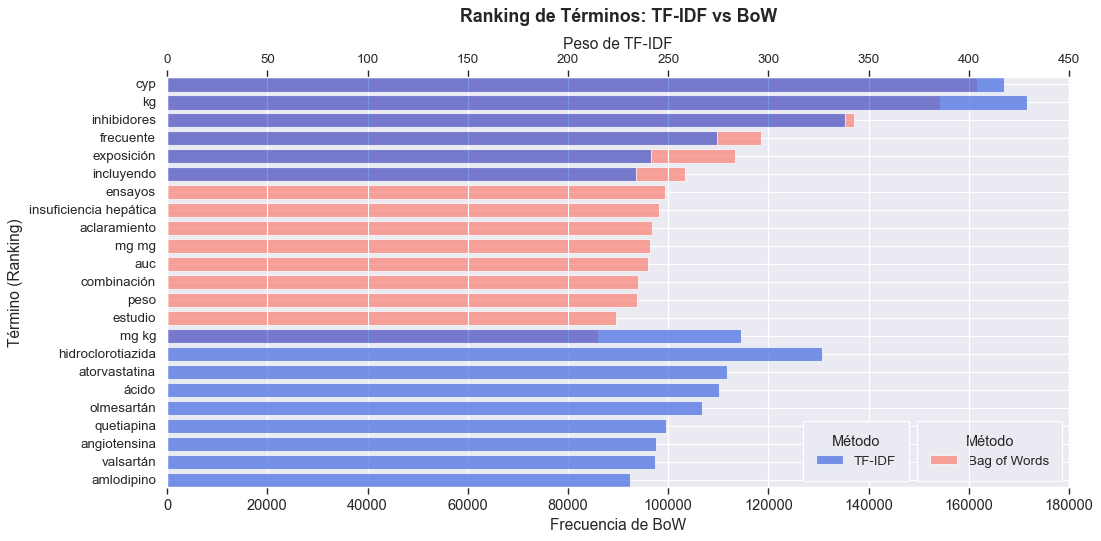

In [7]:
# Vectorizaci√≥n con TF-IDF
tfidf_vectorizer = TfidfVectorizer(
    stop_words=list(stopwords_set),   # lista de stopwords en el idioma correspondiente
    ngram_range=(1, 2),
    min_df=3,                         # t√©rminos que aparecen en menos de 3 documentos se ignoran
    max_df=0.8,                       # se ignoran t√©rminos que aparecen en m√°s del 80% de los documentos
    max_features=10000,               # limita el vocabulario a 10.000 t√©rminos
    lowercase=True                    # convierte todo el texto a min√∫sculas
)
tfidf_matrix = tfidf_vectorizer.fit_transform(texto_medicamentos_df["texto_completo"])
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_feature_names)
tfidf_df.index = texto_medicamentos_df["medicamento"]

# Vectorizaci√≥n con Bag of Words
count_vectorizer = CountVectorizer(
    stop_words=list(stopwords_set),   # Lista de stopwords en el idioma adecuado
    ngram_range=(1, 2),                # Considera unigrams y bigrams
    min_df=3,                          # Ignora t√©rminos que aparecen en menos de 3 documentos
    max_df=0.8,                        # Ignora t√©rminos que aparecen en m√°s del 80% de los documentos
    max_features=10000,                # Limita el vocabulario a 10.000 t√©rminos
    lowercase=True                     # Convierte todo el texto a min√∫sculas
)

bow_matrix = count_vectorizer.fit_transform(texto_medicamentos_df["texto_completo"])
bow_feature_names = count_vectorizer.get_feature_names_out()
bow_df = pd.DataFrame(bow_matrix.toarray(), columns=bow_feature_names)
bow_df.index = texto_medicamentos_df["medicamento"]

# Obtener los t√©rminos m√°s relevantes
top_terms_tfidf = tfidf_df.sum().sort_values(ascending=False).head(15)
top_terms_bow = bow_df.sum().sort_values(ascending=False).head(15)

# Unir en un solo DataFrame y ordenarlo por la suma total
comparison_df = pd.DataFrame({"TF-IDF": top_terms_tfidf, "BoW": top_terms_bow}).fillna(
    0
)
comparison_df["Total"] = comparison_df["TF-IDF"] + comparison_df["BoW"]
comparison_df = comparison_df.sort_values(by="Total", ascending=False)

# Gr√°fico comparativo con dos ejes Y
fig, ax1 = plt.subplots(figsize=(14, 7))

# Eje para BoW (color ajustado)
ax1.barh(
    comparison_df.index,
    comparison_df["BoW"],
    color="salmon",
    label="Bag of Words",
    alpha=0.7,
)
ax1.set_xlabel("Frecuencia de BoW", fontsize=14)
ax1.set_ylabel("T√©rmino (Ranking)", fontsize=14)
ax1.tick_params(axis="y", labelsize=12)
ax1.set_title(
    "Ranking de T√©rminos: TF-IDF vs BoW", fontsize=16, fontweight="bold", pad=50
)  # Ajuste del espacio con `pad`
ax1.invert_yaxis()  # Invertir para mostrar el ranking de mayor a menor

# Crear un segundo eje Y para TF-IDF (color ajustado)
ax2 = ax1.twiny()
ax2.barh(
    comparison_df.index,
    comparison_df["TF-IDF"],
    color="royalblue",
    label="TF-IDF",
    alpha=0.7,
)
ax2.set_xlabel("Peso de TF-IDF", fontsize=14)
ax2.tick_params(axis="x", labelsize=12)

# Mostrar las leyendas con posici√≥n manual ajustada
ax1.legend(
    loc="lower right",
    fontsize=12,
    frameon=True,
    title="M√©todo",
    title_fontsize=13,
    borderpad=1,
    bbox_to_anchor=(1.0, 0.00),
)
ax2.legend(
    loc="lower right",
    fontsize=12,
    frameon=True,
    title="M√©todo",
    title_fontsize=13,
    borderpad=1,
    bbox_to_anchor=(0.83, 0.00),
)

plt.tight_layout()
plt.savefig(os.path.join(output_image_folfer, "comparacion_tfidf_bow.png"), bbox_inches="tight")
plt.show()

Observaciones:

In [8]:
# Define la carpeta de outputs (aseg√∫rate de que exista)
output_folder = "../../data/outputs/3_eda"
os.makedirs(output_folder, exist_ok=True)

# 1. Guardar el DataFrame con el texto concatenado
texto_medicamentos_df.to_csv(
    os.path.join(output_folder, "texto_concatenado_medicamentos.csv"), index=False
)
print("Guardado: DataFrame de texto concatenado.")

# 2. Guardar el vectorizador TF-IDF y la matriz vectorizada
with open(os.path.join(output_folder, "tfidf_vectorizer.pkl"), "wb") as f:
    pickle.dump(tfidf_vectorizer, f)

with open(os.path.join(output_folder, "tfidf_matrix.pkl"), "wb") as f:
    pickle.dump(tfidf_matrix, f)

print("Guardado: tfidf_vectorizer y tfidf_matrix.")

# 3. (Opcional) Guardar el vectorizador BoW y la matriz correspondiente
with open(os.path.join(output_folder, "bow_vectorizer.pkl"), "wb") as f:
    pickle.dump(count_vectorizer, f)

with open(os.path.join(output_folder, "bow_matrix.pkl"), "wb") as f:
    pickle.dump(bow_matrix, f)

print("Guardado: count_vectorizer y bow_matrix.")

Guardado: DataFrame de texto concatenado.
Guardado: tfidf_vectorizer y tfidf_matrix.
Guardado: count_vectorizer y bow_matrix.


---
### **6. Matr√≠z de correlaci√≥n: Extensi√≥n del texto de cada medicamento**

C:\Users\pablo\AppData\Local\Temp\ipykernel_5524\1704282925.py:19: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  longitudes_df = medicamentos_df[longitudes_cols].fillna('').applymap(len)


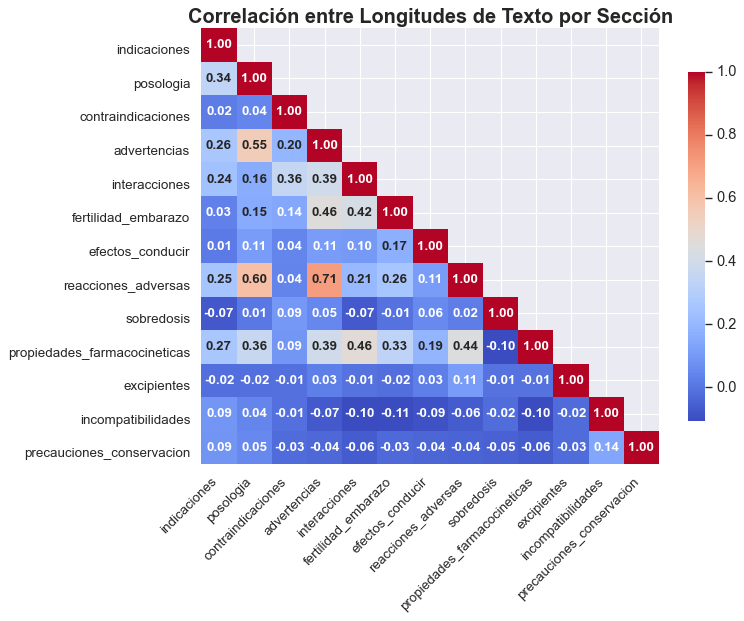

Gr√°fica guardada en: ../../images/correlacion_longitudes_texto.png


In [24]:
# Calcular la longitud de los textos en las columnas seleccionadas
longitudes_cols = [
    "indicaciones",
    "posologia",
    "contraindicaciones",
    "advertencias",
    "interacciones",
    "fertilidad_embarazo",
    "efectos_conducir",
    "reacciones_adversas",
    "sobredosis",
    "propiedades_farmacocineticas",
    "excipientes",
    "incompatibilidades",
    "precauciones_conservacion",
]

# Rellenar los valores nulos y calcular la longitud de cada texto
longitudes_df = medicamentos_df[longitudes_cols].fillna('').applymap(len)

# Calcular la correlaci√≥n entre las longitudes de los textos
correlation_matrix = longitudes_df.corr()

# Crear una m√°scara para ocultar los valores por encima de la diagonal
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)

# Visualizar la correlaci√≥n
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    mask=mask,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0,
    linecolor="gray",
    cbar_kws={"shrink": 0.8},
    annot_kws={"size": 12, "weight": "bold"},
    xticklabels=longitudes_df.columns,
    yticklabels=longitudes_df.columns,
)

# Mejorar la est√©tica
plt.title(
    "Correlaci√≥n entre Longitudes de Texto por Secci√≥n", fontsize=18, weight="bold"
)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(rotation=0, va="top", fontsize=12)
plt.tight_layout()
plt.savefig(os.path.join(output_image_folfer, "correlacion_longitudes_texto.png"), bbox_inches="tight")
plt.show()

# Guardarimagen de la matriz de correlaci√≥n
print(f"Gr√°fica guardada en: {os.path.join(output_image_folfer, 'correlacion_longitudes_texto.png')}")


Observaciones:
- Alta correlaci√≥n lineal entre la extensi√≥n del texto de `advertencias`y `reacciones_adversas` (0.71), as√≠ como con `posolog√≠a`(0.60). Tiene sentido ya que estos campos suelen incluir informaci√≥n sobre efectos secundarios y advertencias de uso.
- Media correlaci√≥n entre `propiedades_farmacocineticas` y campos como `interacciones`(0.46). Esto se debe a que el campo `propiedades_farmacocineticas` incluye informaci√≥n sobre c√≥mo se absorbe, distribuye y elimina el medicamento del organismo, lo que puede influir en las interacciones con otros medicamentos.